# Librerías

Las que se van a usar para este proyecto son:
- Pandas
- Matplotlib
- Numpy

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lectura del DataFrame
Debido a que se en utf-8 no se lee el archivo, el `encoding='latin-1'` permite que se pueda leer el archivo. Es un archivo que está dividido por comas, entonces se debe inicializar a `delimiter=','`. Por sugerencia del motor el último parámetro es inicializado como `low_memory=False`

In [38]:
df = pd.read_csv('Base_2020.csv', delimiter=',', encoding='latin-1', low_memory=False)
df.columns

Index(['cod_encuesta', 'id_base', 'tipo_encuesta', 'fecha_encuesta',
       'id_encuestador', 'modulo0', 'tamano', 'sector', 'p_f1_f1', 'p_f2_f2',
       ...
       'p_p67_p67_6', 'p_p68_p68', 'p_p69_p69_1', 'p_p69_p69_2', 'p_p69_p69_3',
       'p_p69_p69_4', 'p_p69_p69_5', 'p_p70_p70', 'p_p71_p71', 'fexp'],
      dtype='object', length=501)

# Control de muestra
A continuación, se muestra cómo están divididas las empresas de acuerdo a si son; microempresa, pequeña, mediana o grande.

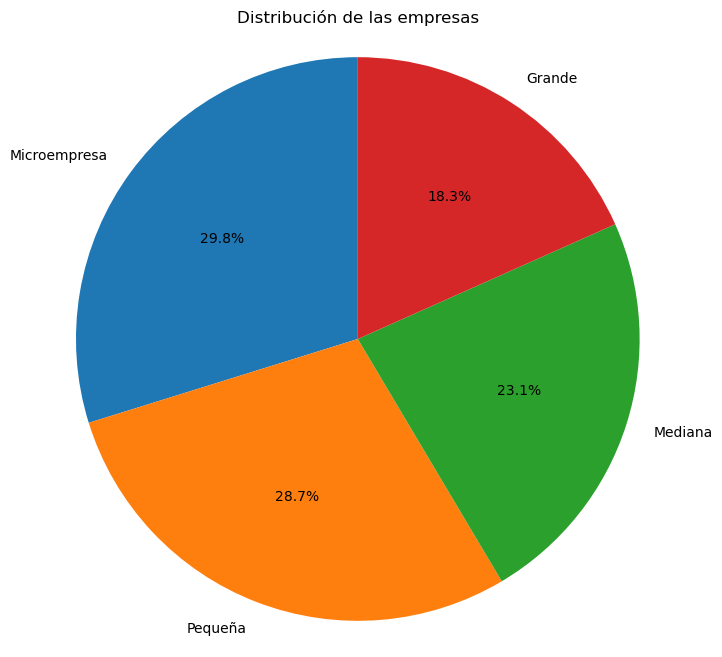

In [39]:
microEmpresa = df[df['p_f1_f1']==2].shape[0]
pequeña = df[df['p_f1_f1']==3].shape[0]
mediana = df[df['p_f1_f1']==4].shape[0]
grande = df[df['p_f1_f1']==5].shape[0]

nombres = ['Microempresa', 'Pequeña', 'Mediana', 'Grande']


plt.figure(figsize=(8,8))
plt.pie([microEmpresa, pequeña, mediana, grande], labels=nombres, autopct='%1.1f%%', startangle=90 )
plt.axis('equal')
plt.title('Distribución de las empresas')
plt.show()

# Matriz con datos filtrados por tamaño de empresa

A continuación, se presenta el diccionario que posee toda la información con respecto a consultar, para acceder a un diccionario se necesita de una **llave**, esta va dentro de `[]` y así se obtendría la matriz entera de los datos que se desean. Las **llaves** que se encuentran disponibles en el diccionario `dictDelitoEmpresa` son:

- `microDelito`: Selecciona las microempresas que han sido víctimas de algún tipo de delito. 
- `pequeDelito`: Pequeñas empresas que han sido víctimas de cualquier tipo de delito. 
- `mediDelito`: Empresas medianas que han sido víctimas de cualquier tipo de delito.
- `grandDelito`: Empresas grandes que han sufrido algún tipo de delito.

Por ejemplo, para consultar cuál es la matriz que posee los datos de las **microempresas** que han sido víctimas de algún delito, entonces, la sintaxis deberá ser:
```python
dictDelitoEmpresa['microDelito']
>>> array([[1., 2., 2., 2., 2., 2.],
       [1., 2., 2., 2., 2., 2.],
       [1., 2., 2., 2., 2., 2.] 
       .
       .
       .])
```  


Cada fila representa un vector con 6 componentes, las cuales representan el delito que sufrió la empresa, (1) lo sufrió y (2) no ha sido víctima. Estos delitos, son en orden:
1. **Hurto.**
2. **Delitos Informáticos.**
3. **Fraude.**
4. **Extorsión.**
5. **Estafa.**
6. **Hurto de automóviles de maquinaria.**

Cada matriz va a tener el siguiente formato donde los elementos van a ser $a_{ij}$, $i$ va a simbolizar la fila y $j$ la columna:
$$
\begin{pmatrix}
    a_{00} & a_{01} & \cdots & a_{06} \\
    a_{10} & a_{11} & \cdots & a_{16} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n0} & a_{n1} & \cdots & a_{n6}
\end{pmatrix}
$$

Para acceder a qué delitos sufrió cierto negocio en específico, entonces se debe agregar un número $i$ que esté dentro del rango de filas de la matriz, es decir, si se quiere acceder al primer negocio que está en la matriz el cual es una microempresa que ha sido afectada por un delito, y se desea ver qué delitos ha sido víctima la empresa, entonces, la sintaxis sería la siguiente:

```python
dictDelitoEmpresa['microDelito'][0]
>>> array([1., 2., 2., 2., 2., 2.])
```

Entonces, la empresa en la primera posición $(0)$ ha sufrido únicamente del delito de hurto, ya que el primer elemento es que posee $(1)$ y los otros están con $(2)$.



Así, se obtienen los vectores para cada empresa de esta segmentación que se realizó.

Para cada variable se pueden recorrer los valores en los rangos de $(fila,\ columna)$:
- `microDelito` Dimensión: $(98,\ 6)$
- `pequeDelito` Dimensión: $(102,\ 6)$
- `mediDelito` Dimensión: $(85,\ 6)$
- `grandDelito` Dimensión: $(60,\ 6)$

Total de empresas que han sufrido de algún tipo de delito: $345$

In [57]:
dictDelitoEmpresa = {'microDelito':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 2)][['p_p67_p67_1', 'p_p67_p67_2', 'p_p67_p67_3', 
                                                                'p_p67_p67_4','p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'pequeDelito':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 3)][['p_p67_p67_1', 'p_p67_p67_2', 'p_p67_p67_3',
                                                              'p_p67_p67_4', 'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'mediDelito':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 4)][['p_p67_p67_1', 'p_p67_p67_2', 'p_p67_p67_3',
                                                              'p_p67_p67_4', 'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'grandDelito':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 5)][['p_p67_p67_1', 'p_p67_p67_2', 'p_p67_p67_3',
                                                              'p_p67_p67_4', 'p_p67_p67_5', 'p_p67_p67_6']].to_numpy()}

dictDelitoEmpresa['microDelito'][0]

array([1., 2., 2., 2., 2., 2.])

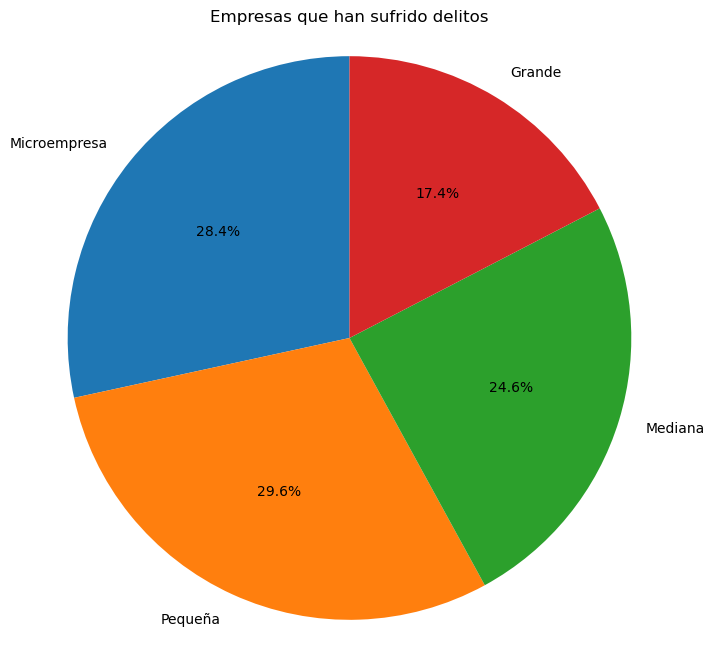

In [71]:

nombres = ['Microempresa', 'Pequeña', 'Mediana', 'Grande']


plt.figure(figsize=(8,8))
plt.pie([len(dictDelitoEmpresa['microDelito']), len(dictDelitoEmpresa['pequeDelito']), len(dictDelitoEmpresa['mediDelito']), len(dictDelitoEmpresa['grandDelito'])], labels=nombres, autopct='%1.1f%%', startangle=90 )
plt.axis('equal')
plt.title('Empresas que han sufrido delitos')
plt.show()

## Segmentación por sector de la empresa
Ahora, ya teniendo las empresas divididas por tamaños y teniendo los delitos, se va a realizar otra segmentación en la cual se tengan los sectores filtrados por delito junto con el tamaño de la empresa.

## Navegar entre el diccionario
Para esto, se utiliza lo mismo que en la anterior sección, metemos una **key** entre `[]` para obtener una matriz entera de los datos, en este caso de aquellos negocios que han sido víctimas de un delito y que pertenecen a alguno de los siguientes sectores:

- Agricultura/Minería.
- Comercio.
- Construcción.
- Industrias.
- Otros servicios

Las **keys** que se emplearon para el diccionario son:

1. `microAgriMine`: Microempresas que han sido víctimas de un delito y que pertenecen al sector de la agricultura o la minería.
2. `microComercio`: Pertenecen al sector del comercio.
3. `microConstruccion`: Pertenecen al sector de la construcción.
4. `microIndustrias`: Pertenecen al sector de las industrias.
5. `microOtros`: Pertenecen al sector de otros servicios.
6. `pequeAgriMine`: Empresas pequeñas que han sido víctimas de un delito y que pertenecen al sector de la agricultura o la minería.
7. `pequeComercio`: Pertenecen al sector del comercio.
8. `pequeConstruccion`: Pertenecen al sector de la construcción.
9. `pequeIndustrias`: Pertenecen al sector de las industrias.
10. `pequeOtros`: Pertenecen al sector de otros servicios.
11. `mediAgriMine`: Empresas medianas que han sido víctimas de un delito y que pertenecen al sector de la agricultura o la minería.
12. `mediComercio`: Pertenecen al sector de comercio.
13. `mediConstruccion`: Pertenecen al sector de la construcción.
14. `mediIndustrias`: Perteneccen al sector de las industrias.
15. `mediOtros`: Pertenecen al sector de otros servicios.
16. `grandAgriMine`: Empresas grandes que han sido víctimas de un delito y que pertenecen al sector de la agricultura o la minería.
17. `grandComercio`: Pertenecen al sector del comercio.
18. `grandConstruccion`: Pertenecen al sector de la construcción.
19. `grandIndustrias`: Pertenecen al sector de las industrias.
20. `grandOtros`: Pertenecen al sector de otros servicios.


Por lo tanto, si se desea saber la matriz de las empresas medianas del sector de construcción que sufrieron de algún tipo de delito, el código sería:

```python
dictDelitoSector['mediConstruccion']
>>> array([[1., 2., 2., 2., 2., 2., 1.],
       [1., 2., 2., 2., 2., 2., 2.],
       [1., 2., 2., 2., 2., 2., 2.],
       [1., 2., 2., 2., 2., 2., 1.],
       [1., 2., 2., 2., 2., 2., 1.],
       [2., 2., 2., 2., 2., 2., 1.],
       [2., 2., 2., 2., 2., 2., 1.],
       [1., 2., 2., 2., 2., 2., 1.],
       [1., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 1.],
       [1., 2., 2., 2., 2., 2., 2.],
       [1., 2., 2., 2., 2., 2., 2.],
       [1., 2., 2., 2., 2., 2., 2.]])
```

Ahora, si se desea saber la tercera empresa mediana del sector de la construcción que sufrió de algún tipo de delito, entonces se utiliza:

```python
dictDelitoSector['mediConstruccion'][2]
>>> array([1., 2., 2., 2., 2., 2., 2.])
```

### Dimensiones de los valores

1. `microAgriMine`: $(16,6)$
2. `microComercio`: $(22, 6)$
3. `microConstruccion`: $(19, 6)$
4. `microIndustrias`: $(17, 6)$
5. `microOtros`: $(24, 6)$
6. `pequeAgriMine`: $(14, 6)$
7. `pequeComercio`: $(25, 6)$
8. `pequeConstruccion`: $(20, 6)$
9. `pequeIndustrias`: $(28, 6)$
10. `pequeOtros`: $(15, 6)$
11. `mediAgriMine`: $(8, 6)$
12. `mediComercio`: $(23, 6)$
13. `mediConstruccion`: $(13, 6)$
14. `mediIndustrias`: $(27, 6)$
15. `mediOtros`: $(14, 6)$
16. `grandAgriMine`: $(7, 6)$
17. `grandComercio`: $(21, 6)$
18. `grandConstruccion`: $(9, 6)$
19. `grandIndustrias`: $(15, 6)$
20. `grandOtros`: $(8, 6)$



In [67]:
dictDelitoSector = {'microAgriMine':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 2) & (df['sector'] == 'AGRICULTURA/MINERIA' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'microComercio':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 2) & (df['sector'] == 'COMERCIO' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'microConstruccion': df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 2) & (df['sector'] == 'CONSTRUCCION' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'microIndustrias':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 2) & (df['sector'] == 'INDUSTRIAS' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'microOtros':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 2) & (df['sector'] == 'OTROS SERVICIOS' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'pequeAgriMine':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 3) & (df['sector'] == 'AGRICULTURA/MINERIA' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'pequeComercio':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 3) & (df['sector'] == 'COMERCIO' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'pequeConstruccion':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 3) & (df['sector'] == 'CONSTRUCCION' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'pequeIndustrias':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 3) & (df['sector'] == 'INDUSTRIAS' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'pequeOtros':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 3) & (df['sector'] == 'OTROS SERVICIOS' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'mediAgriMine':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 4) & (df['sector'] == 'AGRICULTURA/MINERIA' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'mediComercio':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 4) & (df['sector'] == 'COMERCIO' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'mediConstruccion':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 4) & (df['sector'] == 'CONSTRUCCION' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'mediIndustrias':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 4) & (df['sector'] == 'INDUSTRIAS' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'mediOtros':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 4) & (df['sector'] == 'OTROS SERVICIOS' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'grandAgriMine':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 5) & (df['sector'] == 'AGRICULTURA/MINERIA' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'grandComercio':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 5) & (df['sector'] == 'COMERCIO' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'grandConstruccion':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 5) & (df['sector'] == 'CONSTRUCCION' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'grandIndustrias':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 5) & (df['sector'] == 'INDUSTRIAS' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy(),
                    'grandOtros':df[(df['p_p66_p66'] == 1) & (df['p_f1_f1'] == 5) & (df['sector'] == 'OTROS SERVICIOS' )][['p_p67_p67_1', 'p_p67_p67_2',
                                                                                                                    'p_p67_p67_3', 'p_p67_p67_4',
                                                                                                                    'p_p67_p67_5', 'p_p67_p67_6']].to_numpy()}


# Comandos útiles
1. Tabular una variable cualitativa `X:df['X'].value_counts(normalize=False)`
2. Seleccionar solo las variables `X, Y: df[['X', 'Y']]`
3. Filtrar cuando la variable `X` es `x: df[df['X']=='x']`
4. Filtrar cuando la variable `X=x & Y=y: df[(df['X']=='x') & (df['Y']=='y')]`
5. Filtrar por texto de variable: `df[df['X'].str.contains('xxxxx')]`
6. Ordenar por la variable `X: df.sort_values(by=['X'], ascending=True)`
7. Bloquear por una o más condiciones: `df.loc[(df['X']=='x') & (df['Y']=='y')]`
8. Redondear decimales: `round(X, 1)`
9. Reemplazar un símbolo para corregir typos `df['X']=df['X'].str.replace('我', 'Yo')`
10. Recodificar valores de variables `df['X'] = df['X'].replace({'a':'A', 'b':'B'})`
11. Agrupar por `df.groupby(['X', 'Y'])['Z'].aggregate(['count', 'mean', 'std'])`
12. Tabulación cruzada `pd.ccrosstab(df['X'], df['Y'], normalize=False)`
13. Crear una tabla dinámica `df.pivot_table(index='X', columns='Y', values='Z', aggfunc='mean')`